# Tutorial 1

## Introduction
In this assignment you will perform unsupervised learning through 4 different clustering algorithms, you will carry on this task with Iris dataset and toy datasets, to compare between these different approaches, you will employ different metrics, such as accuracy and Xie-beni index. By the end of this tutorial you are expected to achieve the following learning goals:


### Learning goals:
After this tutorial you can:
- perform Hierarchical clustering with different linkage settings;
- Perform K-means clustering with different clusters;
- perform FCM clustering with different clusters;
- Visualize the inner workings of FCM using toy dataset
- perform GK clustering with different clusters;

libraries needed for this assignment:

- sklearn (install: !pip install scikit-learn)
- skfuzzy (install: !pip install scikit-fuzzy)
- scipy (install: !pip install scipy)
- pandas (install: !pip install pandas)
- numpy (install: !pip install numpy)
- matplotlib (install: !pip install matplotlib)
- Pyfume (install: !pip install pyfume)

`Please import the following libraries:`

In [4]:
!pip install pyfume --user

  Obtaining dependency information for pyfume from https://files.pythonhosted.org/packages/ed/ea/a3b120e251145dcdb10777f2bc5f18b1496fd999d705a178c1b0ad947ce1/pyFUME-0.3.4-py3-none-any.whl.metadata
  Using cached pyFUME-0.3.4-py3-none-any.whl.metadata (9.7 kB)
  Obtaining dependency information for simpful==2.12.0 from https://files.pythonhosted.org/packages/9d/0e/aebc2fb0b0f481994179b2ee2b8e6bbf0894d971594688c018375e7076ea/simpful-2.12.0-py3-none-any.whl.metadata
  Using cached simpful-2.12.0-py3-none-any.whl.metadata (4.8 kB)
  Using cached fst_pso-1.8.1-py3-none-any.whl
  Obtaining dependency information for pandas==1.5.3 from https://files.pythonhosted.org/packages/da/6d/1235da14daddaa6e47f74ba0c255358f0ce7a6ee05da8bf8eb49161aa6b5/pandas-1.5.3-cp311-cp311-win_amd64.whl.metadata
  Using cached pandas-1.5.3-cp311-cp311-win_amd64.whl.metadata (12 kB)
  Using cached miniful-0.0.6-py3-none-any.whl
Using cached pyFUME-0.3.4-py3-none-any.whl (60 kB)
Using cached pandas-1.5.3-cp311-cp311-wi

In [1]:
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage, cut_tree
from scipy.optimize import linear_sum_assignment 
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
import skfuzzy as fuzz
from scipy.linalg import norm
from sklearn.metrics import confusion_matrix
from pyfume import *



`Loading the Iris dataset`

In [2]:
# loading and normalizing Iris dataset
iris = load_iris()
iris_data = iris.data
true_labels = iris.target  # True labels

# Normalize the data using z-score
# This is the first step, because we focus on distance for the clustering -> distance is crucial!
scaler = StandardScaler()
iris_data_normalized = scaler.fit_transform(iris_data)


## Part 1: Hierarchical Clustering

For this taks you will carry on `Agglomerative clustering` also known as Agglomerative Nesting (AGNES); it is a type of hierarchical clustering, specifically a bottom-up approach. It starts with each data point as its own individual cluster and then iteratively merges the closest clusters until all points belong to a single cluster, or until a specified number of clusters is reached.

There are several methods to measure similarity between two points, for this exercise we will use the Euclidean distance. Which is measured in different ways: Single linkage, Complete linkage, Average linkage, Ward linkage.

- Load and Normalize: Load the Iris dataset and apply z-score normalization to the features.

- Agglomerative Clustering: Perform agglomerative clustering using single linkage with an initial distance threshold of 0.0.

- Determine Optimal Threshold: Experiment with various distance thresholds (e.g., 0.0, 0.5, 1.0) and identify the optimal threshold based on the accuracy metric of the clusters formed.

- Visualize Dendrograms: Create two subplots: A truncated dendrogram showing the top 3 levels with the chosen threshold marked, and a full dendrogram displaying all levels.

- Scatter Plot: Plot a scatter diagram using two selected features from the Iris dataset, coloring points by the optimal clusters and the actual classes.

- Find the optimal distance threshold when using complete and average linkage.

- Discussion: Reflect on the optimal distance threshold, the number of clusters formed, and how well the clusters correspond to the actual classes.

### Exercise 1.1: Single Linkage

`Perform agglomerative clustering with single linkage and zero distance threshold`

When performing agglomerative clustering with single linkage and a zero distance threshold, your clustering function should return the following:

1. **Linkage Matrix (`Z`)**: The hierarchical clustering encoded as a linkage matrix, which can be obtained using the <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html" target="_blank">`linkage`</a> function from `scipy.cluster.hierarchy`.

2. **Cluster Labels (`clusters`)**: An array containing the cluster labels for each data point, based on the specified distance threshold. You can get this by applying the <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.cut_tree.html" target="_blank">`cut_tree`</a> function to the linkage matrix with the height parameter set to the distance threshold.

3. **Distance Threshold (`distance_threshold`)**: The threshold value used for forming clusters. This is essential for plotting and should be set to zero, as specified.

Returning these three variables will allow the provided plotting function to display the dendrograms accurately.


Linkage matrix:
 [[2.         3.         0.6264982  2.        ]
 [0.         1.         1.0198039  2.        ]
 [5.         6.         1.03561576 4.        ]
 [4.         7.         1.38253391 5.        ]]


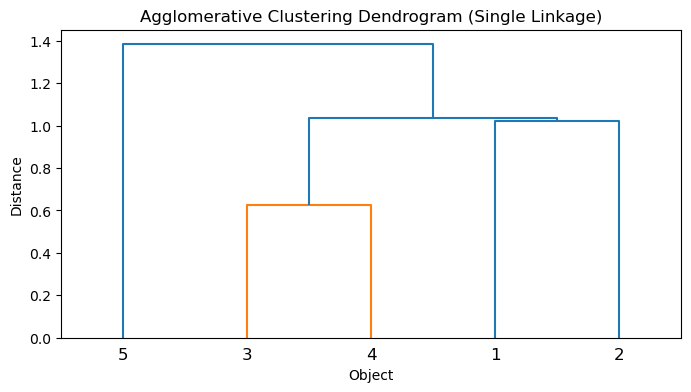

In [63]:
import numpy as np
from scipy.cluster.hierarchy import linkage, dendrogram

# Define the dissimilarity matrix (distance matrix)
# Since single linkage works with distances, convert the similarity matrix to a distance matrix.
similarity_matrix = np.array([
    [1,    0,    0,    0,    0],
    [0.8,    1,    0,    0,  0],
    [0.4,    0.3,  0.2,  1,    0],
    [0.7,    0.85, 0.2,  1, 0],
    [0.83,   0.1,  0.9,  0.25, 1]
])
# Convert similarity to distance: 1 - similarity (to convert to a distance metric)
distance_matrix = 1 - similarity_matrix

# The 'linkage' function performs hierarchical/agglomerative clustering
# Here we use 'single' linkage (which is minimum distance between clusters)
Z = linkage(distance_matrix, method='single')

# Print the linkage matrix to analyze the merging process
print("Linkage matrix:\n", Z)

# Optionally, plot the dendrogram to visualize the clustering process
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 4))
dendrogram(Z, labels=['1', '2', '3', '4', '5'])
plt.title("Agglomerative Clustering Dendrogram (Single Linkage)")
plt.xlabel("Object")
plt.ylabel("Distance")
plt.show()

In [58]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Creating the DataFrame with Miles per gallon (MPG) and Horsepower
data = {
    'Miles per gallon (MPG)': [24, 25, 18, 19, 20],
    'Horsepower': [82, 68, 99, 103, 98]
}

df = pd.DataFrame(data)

# Perform KMeans clustering with k=2
# Cluster 1 (Peugeot 504, Honda Civic)
cluster1_mpg = [24, 25]
cluster1_hp = [82, 68]

# Cluster 2 (ToyotaY Corona, Datsun 710, VW Rabbit)
cluster2_mpg = [18, 19, 20]
cluster2_hp = [99, 103, 98]

# Compute centroids
centroid1_mpg = sum(cluster1_mpg) / len(cluster1_mpg)
centroid1_hp = sum(cluster1_hp) / len(cluster1_hp)

centroid2_mpg = sum(cluster2_mpg) / len(cluster2_mpg)
centroid2_hp = sum(cluster2_hp) / len(cluster2_hp)

centroid1_mpg, centroid1_hp, centroid2_mpg, centroid2_hp


(24.5, 75.0, 19.0, 100.0)

In [54]:
kmeans = KMeans(n_clusters=2)
clusters = kmeans.fit_predict(df)

c:\Users\20202631\AppData\Local\anaconda3v2\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


AttributeError: 'NoneType' object has no attribute 'split'

In [51]:
# Perform K-means
# Redefining the cluster_range for plotting process
cluster_range = range(1,11)

# Perform K-means clustering for each number of clusters
kmeans_results = []
for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    clusters = kmeans.fit_predict(iris_data_normalized)
    kmeans_results.append(clusters)

return kmeans_results

c:\Users\20202631\AppData\Local\anaconda3v2\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


AttributeError: 'NoneType' object has no attribute 'split'

In [64]:
# write your Clustering function here
def perform_clustering(data, method='single', distance_threshold=0.0):
    # Perform agglomerative clustering with single linkage
    Z = linkage(data, method=method)  

    # Create clusters using the specified distance threshold
    clusters = cut_tree(Z, height=distance_threshold).flatten() #the flatten() operation is used to convert the output of the cut_tree() function, which is typically a 2D array, into a 1D array (or vector) of cluster labels.

    # Count the number of unique clusters
    num_clusters = len(np.unique(clusters))
    print(f"Number of clusters formed: {num_clusters}")

    # Return the linkage matrix, cluster labels, and distance threshold
    return Z, clusters, distance_threshold
    
# return Z, clusters, distance_threshold = perform_clustering()

Z, clusters, distance_threshold = perform_clustering(iris_data_normalized, 'single', distance_threshold=0.0)
Z1, clusters1, distance_threshold1 = perform_clustering(distance_matrix, 'single', distance_threshold=0.0)

Number of clusters formed: 150
Number of clusters formed: 5


`Use the following plotting function to visualize your dendrograms`

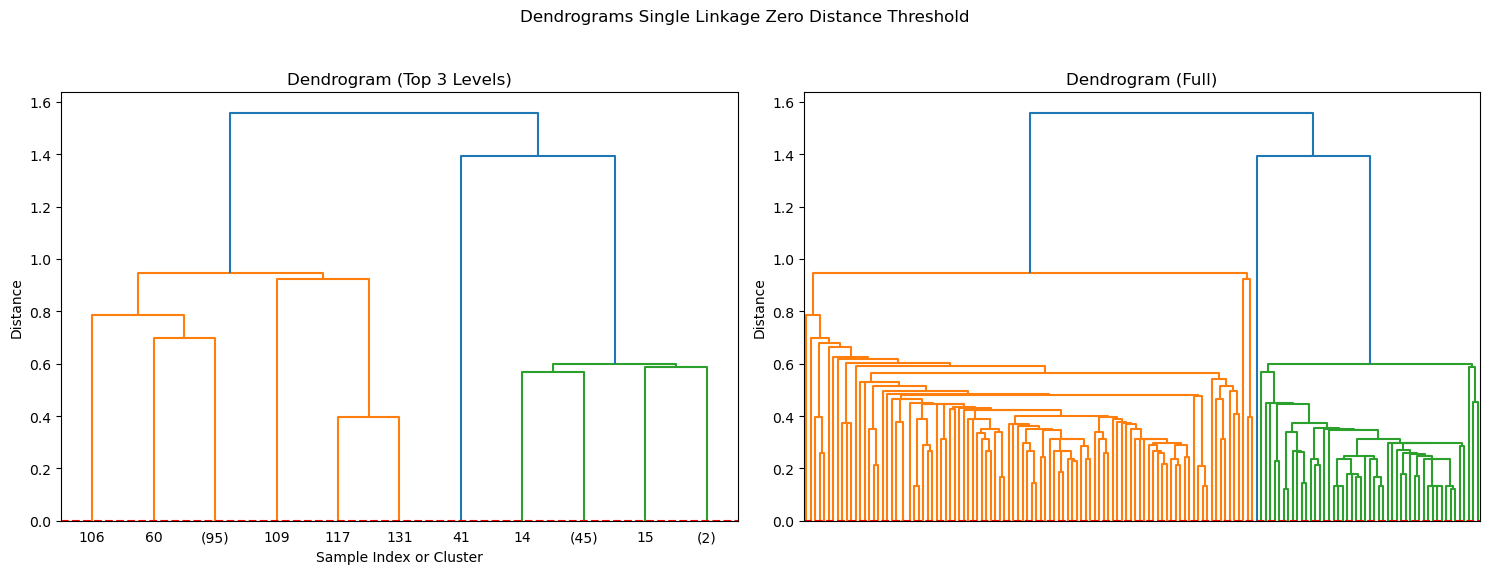

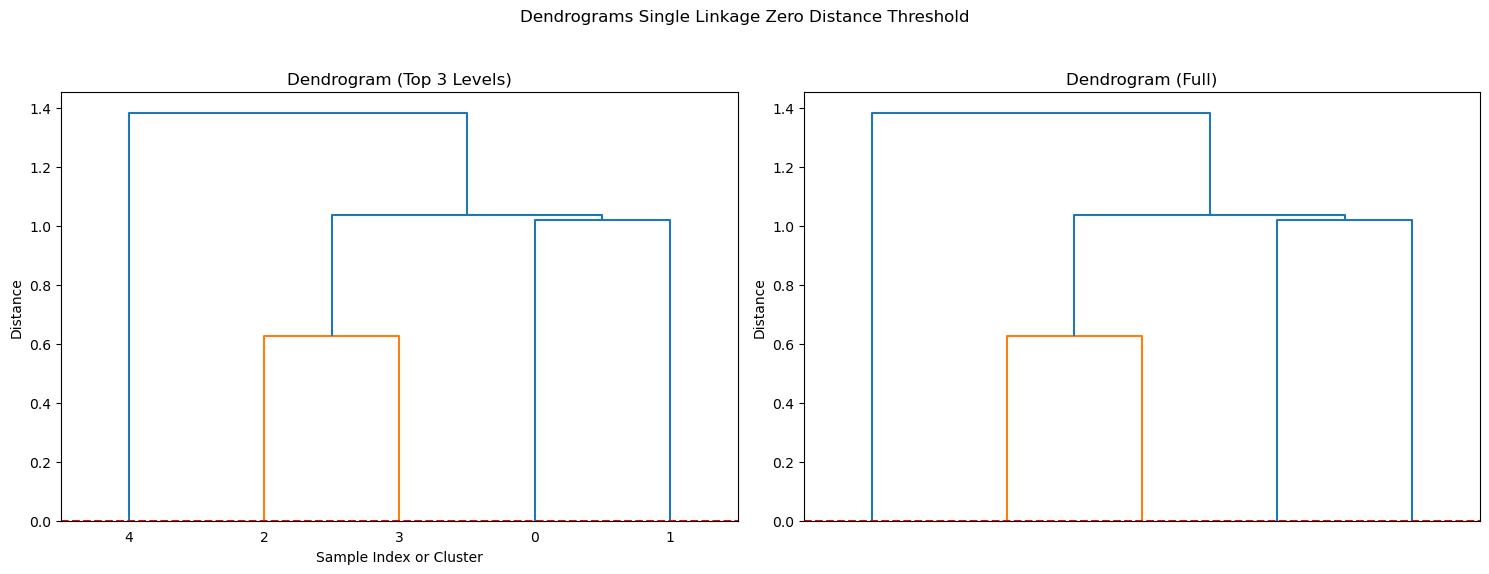

In [65]:

# Plotting function
def plot_dendrogram(Z, clusters, distance_threshold=0.0):
    # Create a figure with two subplots
    fig, axs = plt.subplots(1, 2, figsize=(15, 6))

    # Plot the truncated dendrogram (top 3 levels)
    dendrogram(Z, 
               truncate_mode='level',  
               p=3,  # Denotes the top 3 levels                    
               labels=clusters,        
               leaf_rotation=0,        
               leaf_font_size=10,      
               ax=axs[0])              
    axs[0].axhline(y=distance_threshold, color='r', linestyle='--')
    axs[0].set_title("Dendrogram (Top 3 Levels)")
    axs[0].set_xlabel("Sample Index or Cluster")
    axs[0].set_ylabel("Distance")

    # Plot the full dendrogram (all levels)
    dendrogram(Z, 
               truncate_mode=None,  
               labels=clusters,     
               leaf_rotation=0,     
               leaf_font_size=10,   
               ax=axs[1],           
               show_leaf_counts=False)  
    axs[1].axhline(y=distance_threshold, color='r', linestyle='--')
    axs[1].set_title("Dendrogram (Full)")
    axs[1].set_xlabel("")  
    axs[1].set_ylabel("Distance")
    axs[1].set_xticks([])

    # Set the main title for the entire figure
    plt.suptitle("Dendrograms Single Linkage Zero Distance Threshold")
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()



# Use the results for plotting
plot_dendrogram(Z, clusters, distance_threshold)
plot_dendrogram(Z1, clusters1, distance_threshold1)

`Using the following accuracy function to answer the following questions`
- What is the optimal distance threshold yielding the best accuracy?
- What is the distance threshold yielding 3 clusters?

Distance Threshold: 0.05
Number of clusters formed: 149
Accuracy achieved: 0.0067


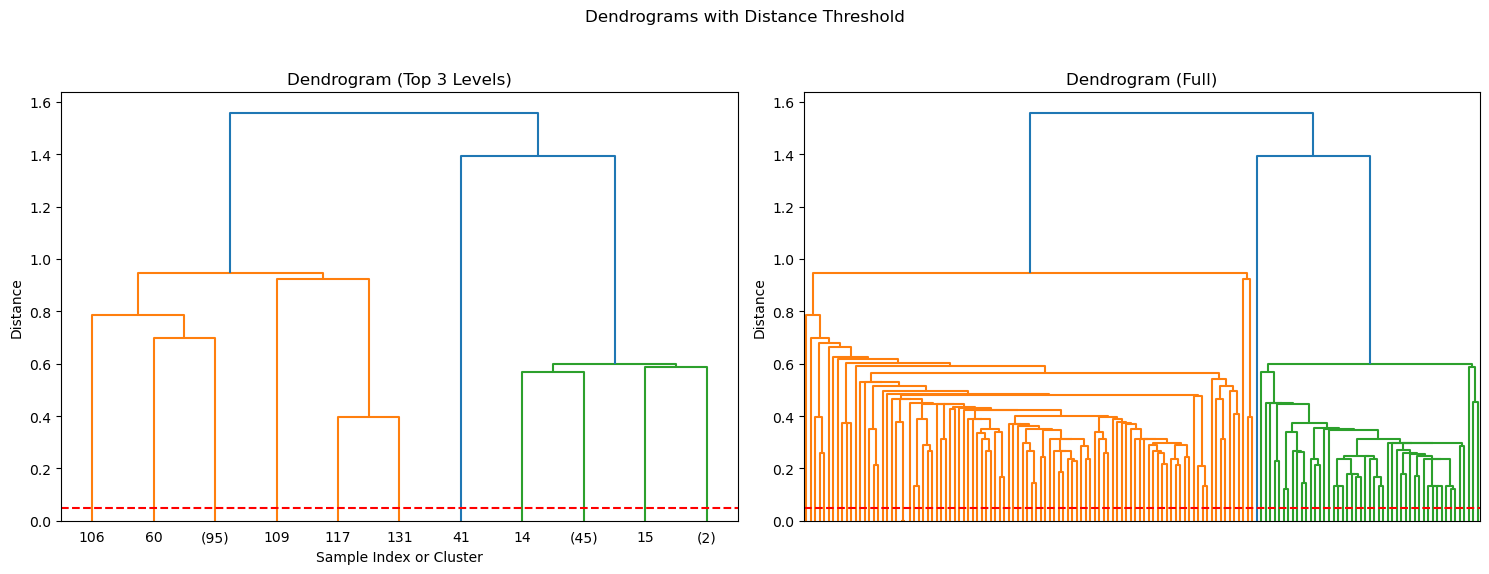

In [10]:
# set distance threshold, replace 0 value with your value
distance_threshold = 0.05

# Define the function to calculate accuracy
def calculate_accuracy(clusters, true_labels):
    cm = confusion_matrix(true_labels, clusters)
    accuracy = np.trace(cm) / np.sum(cm)  # Trace sums the diagonal (True predictions)
    return accuracy

# Function to perform clustering based on a manually entered threshold
def manual_threshold_clustering(Z, true_labels, distance_threshold):
    # Create clusters using the specified distance threshold
    clusters = cut_tree(Z, height=distance_threshold).flatten()
    
    # Count the number of unique clusters
    num_clusters = len(np.unique(clusters))
    
    # Calculate accuracy
    accuracy = calculate_accuracy(clusters, true_labels)
    
    # Print results
    print(f"Distance Threshold: {distance_threshold}")
    print(f"Number of clusters formed: {num_clusters}")
    print(f"Accuracy achieved: {accuracy:.4f}")
    
    # Plot the dendrogram
    plot_dendrogram(Z, clusters, distance_threshold)

# Dendrogram plotting function
def plot_dendrogram(Z, clusters, distance_threshold):
    # Create a figure with two subplots
    fig, axs = plt.subplots(1, 2, figsize=(15, 6))

    # Plot the truncated dendrogram (top 3 levels)
    dendrogram(Z, 
               truncate_mode='level',  
               p=3,                    
               leaf_rotation=0,        
               leaf_font_size=10,      
               ax=axs[0])              
    axs[0].axhline(y=distance_threshold, color='r', linestyle='--')
    axs[0].set_title("Dendrogram (Top 3 Levels)")
    axs[0].set_xlabel("Sample Index or Cluster")
    axs[0].set_ylabel("Distance")

    # Plot the full dendrogram (all levels)
    dendrogram(Z, 
               truncate_mode=None,  
               labels=clusters,     
               leaf_rotation=0,     
               leaf_font_size=10,   
               ax=axs[1],           
               show_leaf_counts=False)  
    axs[1].axhline(y=distance_threshold, color='r', linestyle='--')
    axs[1].set_title("Dendrogram (Full)")
    axs[1].set_xlabel("")  
    axs[1].set_ylabel("Distance")
    axs[1].set_xticks([])

    # Set the main title for the entire figure
    plt.suptitle("Dendrograms with Distance Threshold")
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

# Ask for manual input of the distance threshold
manual_threshold_clustering(Z, true_labels, distance_threshold)

# Need to increase the distance threshold -> currently cannot identify valuable clusters
# Could use gridsearch to find a distance threshold


`Based on your experiments, set the best_threshold value as the distance threshold resulting in 3 clusters to visualize Iris (Petal width and Petal length)`

Best Distance Threshold: 1.2
Number of clusters formed: 3
accuracy:  0.66


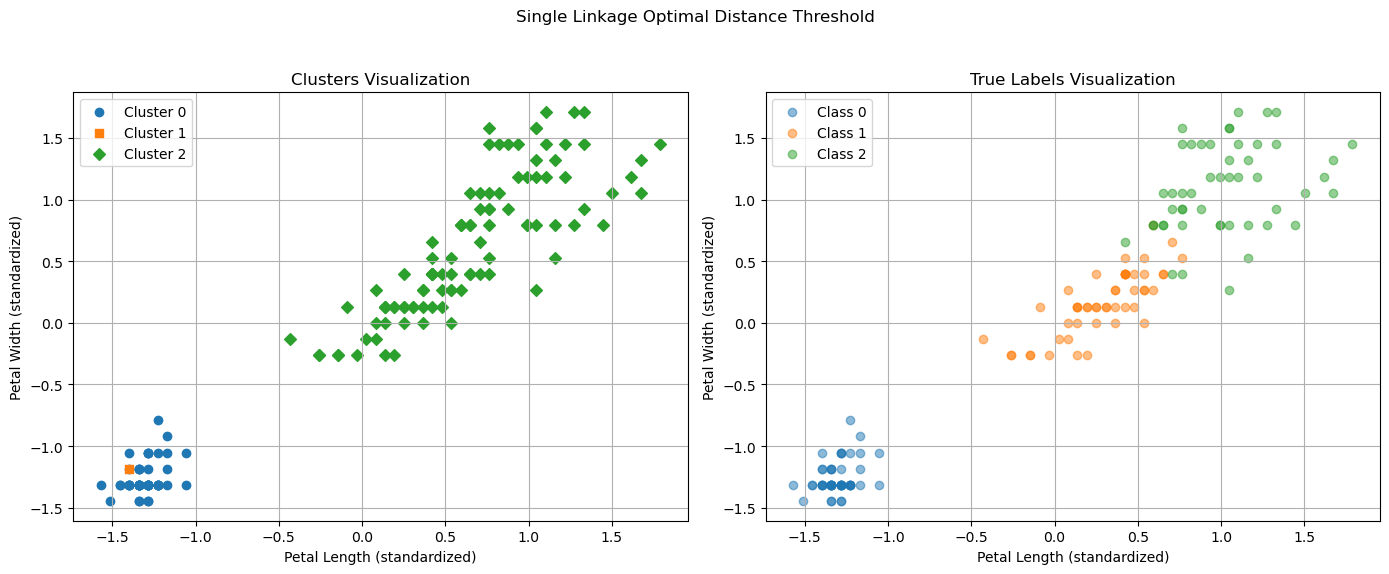

In [20]:
best_threshold = 1.2


# Perform agglomerative clustering with single linkage
Z = linkage(iris_data_normalized, method='single')


# Find the number of clusters formed with the best threshold
best_clusters = cut_tree(Z, height=best_threshold).flatten()
num_clusters = len(np.unique(best_clusters))

print(f"Best Distance Threshold: {best_threshold}")
print(f"Number of clusters formed: {num_clusters}")

# Define marker shapes for each cluster
markers = ['o', 's', 'D', 'X']  # Circle, Square, Diamond, X
colors = ['r', 'g', 'b']  # Colors for true labels (0, 1, 2)

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Plot clusters with different shapes
for cluster in range(num_clusters):
    cluster_points = iris_data_normalized[best_clusters == cluster]
    
    # Use the third and fourth features (Petal length and Petal width)
    axs[0].scatter(
        cluster_points[:, 2],  # Petal length
        cluster_points[:, 3],  # Petal width
        marker=markers[cluster % len(markers)],  # Different shape for each cluster
        label=f'Cluster {cluster}'
    )

axs[0].set_title('Clusters Visualization')
axs[0].set_xlabel('Petal Length (standardized)')
axs[0].set_ylabel('Petal Width (standardized)')
axs[0].legend()
axs[0].grid()

# Plot true labels with different colors
for label in np.unique(true_labels):
    label_points = iris_data_normalized[true_labels == label]
    
    axs[1].scatter(
        label_points[:, 2],  # Petal length
        label_points[:, 3],  # Petal width
        label=f'Class {label}',
        alpha=0.5  # Slight transparency for better visualization
    )

axs[1].set_title('True Labels Visualization')
axs[1].set_xlabel('Petal Length (standardized)')
axs[1].set_ylabel('Petal Width (standardized)')
axs[1].legend()
axs[1].grid()
print('accuracy: ', calculate_accuracy(best_clusters, true_labels))

# Set the main title for the entire figure
plt.suptitle("Single Linkage Optimal Distance Threshold")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to reserve space for the main title
plt.show()


### Exercise 1.2: Complete linkage
Perform agglomerative clustering using complete linkage. In a similar manner find the optimal distance threshold.

In [21]:
# Clustering function
def perform_clustering(data, method='complete', distance_threshold=0.0):
    # Distance_threshold doesn't affect the amount of clusters
    # Perform agglomerative clustering with single linkage
    Z = linkage(data, method=method)  

    # Create clusters using the specified distance threshold
    clusters = cut_tree(Z, height=distance_threshold).flatten()

    # Count the number of unique clusters
    num_clusters = len(np.unique(clusters))
    print(f"Number of clusters formed: {num_clusters}")

    # Return the linkage matrix, cluster labels, and distance threshold
    return Z, clusters, distance_threshold


Z, clusters, distance_threshold = perform_clustering(iris_data_normalized, method='complete', distance_threshold=0.0)


Number of clusters formed: 150


`Visualize your dendograms and experiment with the distance threshold`

Distance Threshold: 0.05
Number of clusters formed: 149
Accuracy achieved: 0.0067


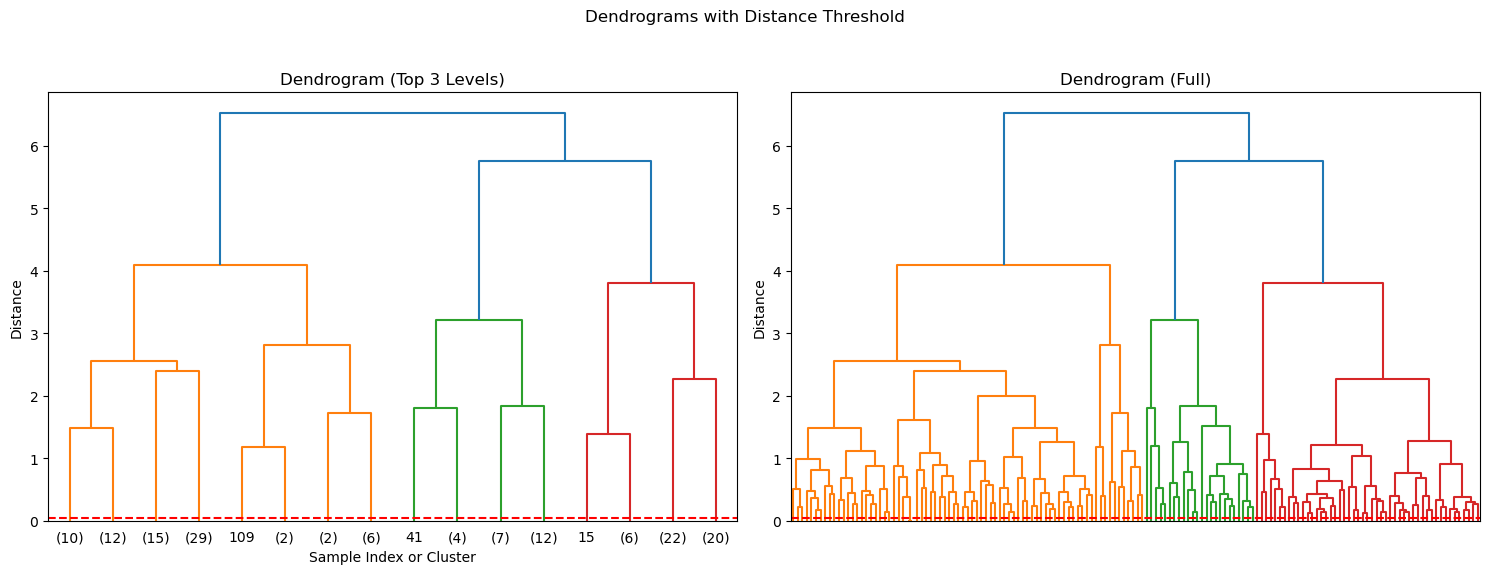

In [22]:

# set distance threshold, replace 0 value with your value
distance_threshold = 0.05

# Define the function to calculate accuracy
def calculate_accuracy(clusters, true_labels):
    cm = confusion_matrix(true_labels, clusters)
    accuracy = np.trace(cm) / np.sum(cm)
    return accuracy

# Function to perform clustering based on a manually entered threshold
def manual_threshold_clustering(Z, true_labels, distance_threshold):
    # Create clusters using the specified distance threshold
    clusters = cut_tree(Z, height=distance_threshold).flatten()
    
    # Count the number of unique clusters
    num_clusters = len(np.unique(clusters))
    
    # Calculate accuracy
    accuracy = calculate_accuracy(clusters, true_labels)
    
    # Print results
    print(f"Distance Threshold: {distance_threshold}")
    print(f"Number of clusters formed: {num_clusters}")
    print(f"Accuracy achieved: {accuracy:.4f}")
    
    # Plot the dendrogram
    plot_dendrogram(Z, clusters, distance_threshold)

# Dendrogram plotting function
def plot_dendrogram(Z, clusters, distance_threshold):
    # Create a figure with two subplots
    fig, axs = plt.subplots(1, 2, figsize=(15, 6))

    # Plot the truncated dendrogram (top 3 levels)
    dendrogram(Z, 
               truncate_mode='level',  
               p=3,                    
               leaf_rotation=0,        
               leaf_font_size=10,      
               ax=axs[0])              
    axs[0].axhline(y=distance_threshold, color='r', linestyle='--')
    axs[0].set_title("Dendrogram (Top 3 Levels)")
    axs[0].set_xlabel("Sample Index or Cluster")
    axs[0].set_ylabel("Distance")

    # Plot the full dendrogram (all levels)
    dendrogram(Z, 
               truncate_mode=None,  
               labels=clusters,     
               leaf_rotation=0,     
               leaf_font_size=10,   
               ax=axs[1],           
               show_leaf_counts=False)  
    axs[1].axhline(y=distance_threshold, color='r', linestyle='--')
    axs[1].set_title("Dendrogram (Full)")
    axs[1].set_xlabel("")  
    axs[1].set_ylabel("Distance")
    axs[1].set_xticks([])

    # Set the main title for the entire figure
    plt.suptitle("Dendrograms with Distance Threshold")
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

# Ask for manual input of the distance threshold
manual_threshold_clustering(Z, true_labels, distance_threshold)

`Visuliaze Iris dataset using your distance threshold`

Best Distance Threshold: 1.3
Number of clusters formed: 19
accuracy:  0.14666666666666667


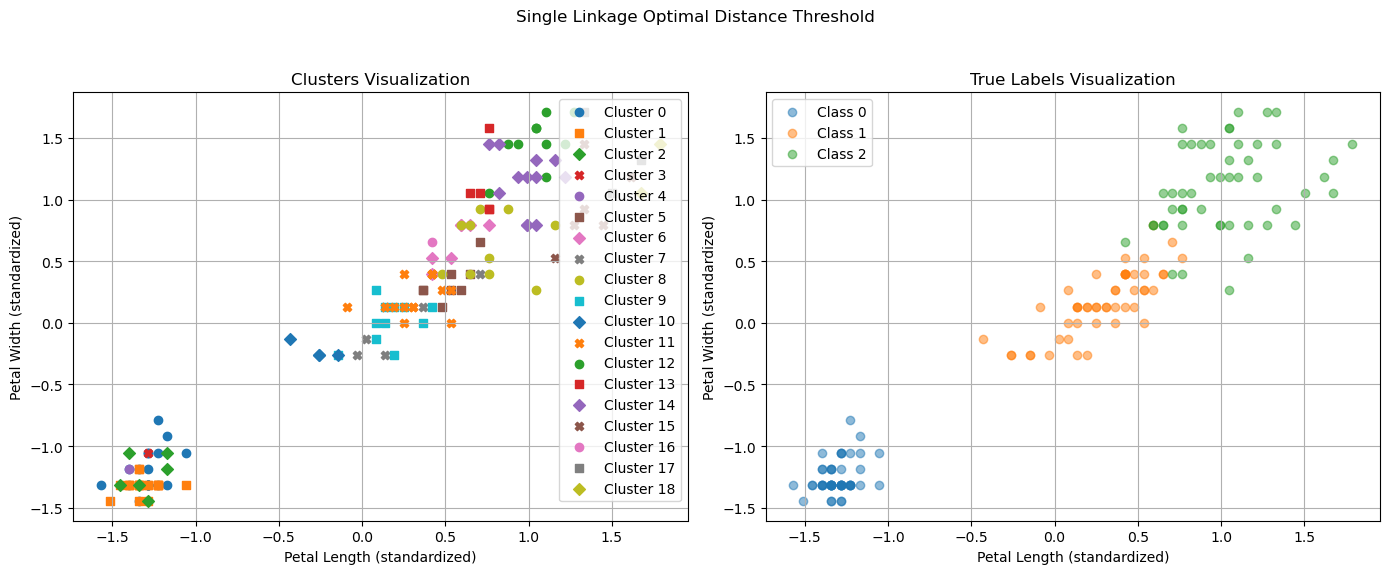

In [24]:
best_threshold = 1.30

# Perform agglomerative clustering with single linkage
Z = linkage(iris_data_normalized, method='complete')


# Find the number of clusters formed with the best threshold
best_clusters = cut_tree(Z, height=best_threshold).flatten()
num_clusters = len(np.unique(best_clusters))

print(f"Best Distance Threshold: {best_threshold}")
print(f"Number of clusters formed: {num_clusters}")

# Define marker shapes for each cluster
markers = ['o', 's', 'D', 'X']  # Circle, Square, Diamond, X
colors = ['r', 'g', 'b']  # Colors for true labels (0, 1, 2)

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Plot clusters with different shapes
for cluster in range(num_clusters):
    cluster_points = iris_data_normalized[best_clusters == cluster]
    
    # Use the third and fourth features (Petal length and Petal width)
    axs[0].scatter(
        cluster_points[:, 2],  # Petal length
        cluster_points[:, 3],  # Petal width
        marker=markers[cluster % len(markers)],  # Different shape for each cluster
        label=f'Cluster {cluster}'
    )

axs[0].set_title('Clusters Visualization')
axs[0].set_xlabel('Petal Length (standardized)')
axs[0].set_ylabel('Petal Width (standardized)')
axs[0].legend()
axs[0].grid()

# Plot true labels with different colors
for label in np.unique(true_labels):
    label_points = iris_data_normalized[true_labels == label]
    
    axs[1].scatter(
        label_points[:, 2],  # Petal length
        label_points[:, 3],  # Petal width
        label=f'Class {label}',
        alpha=0.5  # Slight transparency for better visualization
    )

axs[1].set_title('True Labels Visualization')
axs[1].set_xlabel('Petal Length (standardized)')
axs[1].set_ylabel('Petal Width (standardized)')
axs[1].legend()
axs[1].grid()

print('accuracy: ', calculate_accuracy(best_clusters, true_labels))
# increasing distance leads to worse accuracy => single method works better here

# Set the main title for the entire figure
plt.suptitle("Single Linkage Optimal Distance Threshold")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to reserve space for the main title
plt.show()


### Exercise 1.3: Average linkage

`Perform as the previous exercise but this time use an average linkage`

In [ ]:
# create average clustering fuction
# Clustering function
def perform_clustering(data, method='method_of_linkage_to_be_used', distance_threshold=0.0):
    # Perform agglomerative clustering with single linkage
    Z = linkage()
    
    # Create clusters using the specified distance threshold
    clusters = cut_tree().flatten()
    
    # Count the number of unique clusters
    num_clusters = 
    print(f"Number of clusters formed: {num_clusters}")
    
    # Return the linkage matrix, cluster labels, and distance threshold
    return 

# return Z, clusters, distance_threshold = perform_clustering()



`Visualize your dendograms and experiment with the distance threshold`

In [ ]:

# set distance threshold, replace 0 value with your value
distance_threshold = 0.5

# Define the function to calculate accuracy
def calculate_accuracy(clusters, true_labels):
    cm = confusion_matrix(true_labels, clusters)
    accuracy = np.trace(cm) / np.sum(cm)
    return accuracy

# Function to perform clustering based on a manually entered threshold
def manual_threshold_clustering(Z, true_labels, distance_threshold):
    # Create clusters using the specified distance threshold
    clusters = cut_tree(Z, height=distance_threshold).flatten()
    
    # Count the number of unique clusters
    num_clusters = len(np.unique(clusters))
    
    # Calculate accuracy
    accuracy = calculate_accuracy(clusters, true_labels)
    
    # Print results
    print(f"Distance Threshold: {distance_threshold}")
    print(f"Number of clusters formed: {num_clusters}")
    print(f"Accuracy achieved: {accuracy:.4f}")
    
    # Plot the dendrogram
    plot_dendrogram(Z, clusters, distance_threshold)

# Dendrogram plotting function
def plot_dendrogram(Z, clusters, distance_threshold):
    # Create a figure with two subplots
    fig, axs = plt.subplots(1, 2, figsize=(15, 6))

    # Plot the truncated dendrogram (top 3 levels)
    dendrogram(Z, 
               truncate_mode='level',  
               p=3,                    
               leaf_rotation=0,        
               leaf_font_size=10,      
               ax=axs[0])              
    axs[0].axhline(y=distance_threshold, color='r', linestyle='--')
    axs[0].set_title("Dendrogram (Top 3 Levels)")
    axs[0].set_xlabel("Sample Index or Cluster")
    axs[0].set_ylabel("Distance")

    # Plot the full dendrogram (all levels)
    dendrogram(Z, 
               truncate_mode=None,  
               labels=clusters,     
               leaf_rotation=0,     
               leaf_font_size=10,   
               ax=axs[1],           
               show_leaf_counts=False)  
    axs[1].axhline(y=distance_threshold, color='r', linestyle='--')
    axs[1].set_title("Dendrogram (Full)")
    axs[1].set_xlabel("")  
    axs[1].set_ylabel("Distance")
    axs[1].set_xticks([])

    # Set the main title for the entire figure
    plt.suptitle("Dendrograms with Distance Threshold")
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

# Ask for manual input of the distance threshold
manual_threshold_clustering(Z, true_labels, distance_threshold)

`Visualize iris dataset with 3 cluster and your distance threshold`

In [ ]:
best_threshold = 1.30



# Perform agglomerative clustering with single linkage
Z = linkage(iris_data_normalized, method='average')


# Find the number of clusters formed with the best threshold
best_clusters = cut_tree(Z, height=best_threshold).flatten()
num_clusters = len(np.unique(best_clusters))

print(f"Best Distance Threshold: {best_threshold}")
print(f"Best Accuracy: {best_accuracy:.4f}")
print(f"Number of clusters formed: {num_clusters}")

# Define marker shapes for each cluster
markers = ['o', 's', 'D', 'X']  # Circle, Square, Diamond, X
colors = ['r', 'g', 'b']  # Colors for true labels (0, 1, 2)

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Plot clusters with different shapes
for cluster in range(num_clusters):
    cluster_points = iris_data_normalized[best_clusters == cluster]
    
    # Use the third and fourth features (Petal length and Petal width)
    axs[0].scatter(
        cluster_points[:, 2],  # Petal length
        cluster_points[:, 3],  # Petal width
        marker=markers[cluster % len(markers)],  # Different shape for each cluster
        label=f'Cluster {cluster}'
    )

axs[0].set_title('Clusters Visualization')
axs[0].set_xlabel('Petal Length (standardized)')
axs[0].set_ylabel('Petal Width (standardized)')
axs[0].legend()
axs[0].grid()

# Plot true labels with different colors
for label in np.unique(true_labels):
    label_points = iris_data_normalized[true_labels == label]
    
    axs[1].scatter(
        label_points[:, 2],  # Petal length
        label_points[:, 3],  # Petal width
        label=f'Class {label}',
        alpha=0.5  # Slight transparency for better visualization
    )

axs[1].set_title('True Labels Visualization')
axs[1].set_xlabel('Petal Length (standardized)')
axs[1].set_ylabel('Petal Width (standardized)')
axs[1].legend()
axs[1].grid()

# Set the main title for the entire figure
plt.suptitle("Single Linkage Optimal Distance Threshold")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to reserve space for the main title
plt.show()


---
---

## Part 2: K-means Clustering

### Exercise 2.1: Perform K-means clustering on Iris dataset

In this exercise, you will apply K-means clustering to the Iris dataset and analyze how the number of clusters affects the clustering accuracy. Follow these steps:

1. Implement K-means clustering for a range of cluster numbers (from 1 to 10).
2. Evaluate the clustering accuracy for each number of clusters.
3. Visualize the results to determine the optimal number of clusters.

#### Instructions:

1. Create a loop that iterates through the range of cluster numbers (1 to 10).
2. For each iteration:
   a. Perform K-means clustering using `sklearn.cluster.KMeans`.
   b. Use the `fit_predict` method to obtain cluster assignments.
   c. Store the cluster assignments in a list called `kmeans_results`.
3. Calculate the accuracy for each clustering result.
4. Generate a plot showing:
   a. The number of clusters vs. clustering accuracy.
   b. A scatter plot of the Iris data using Petal Length and Petal Width, colored by:
      - The cluster assignments for the optimal number of clusters.
      - The true class labels.

This exercise will help you understand how the choice of cluster number affects K-means performance and how well the algorithm can recover the natural classes in the Iris dataset.

To facilitate this task we created the accuracy and visualization functions for you!

In [38]:
# Perform K-means
# Redefining the cluster_range for plotting process
cluster_range = range(1,11)

# Perform K-means clustering for each number of clusters
kmeans_results = []
for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    clusters = kmeans.fit_predict(iris_data_normalized)
    kmeans_results.append(clusters)

return kmeans_results

c:\Users\20202631\AppData\Local\anaconda3v2\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


AttributeError: 'NoneType' object has no attribute 'split'

`run the following code for accuary and visulaization`

In [ ]:
# Calculate accuracies separately
accuracies = []
for clusters in kmeans_results:
    # Using sklearn's confusion_matrix to generate the contingency matrix
    contingency_matrix = confusion_matrix(true_labels, clusters)

    # For each cluster, find the maximum true label count
    correct_predictions = sum(np.max(contingency_matrix, axis=0))

    # Calculate accuracy
    accuracy = correct_predictions / len(true_labels)
    accuracies.append(accuracy)

# Plot setup
fig, axs = plt.subplots(1, 3, figsize=(24, 6))

# Plotting number of clusters vs. accuracy on the left subplot
axs[0].plot(cluster_range, accuracies, marker='o', color='b', label="Accuracy")
axs[0].set_title("Number of Clusters vs. Accuracy")
axs[0].set_xlabel("Number of Clusters")
axs[0].set_ylabel("Accuracy")
axs[0].set_xlim(0, 11)  # Setting x-axis limit
axs[0].set_ylim(0, 1.1)  # Setting y-axis limit
axs[0].set_xticks(range(0, 12))  # Setting x-ticks every 1 increment
axs[0].set_yticks(np.arange(0, 1.1, 0.1))  # Setting y-ticks every 0.1 increment
axs[0].grid()
axs[0].legend()

# K-means clustering with 3 clusters for visualization on the middle subplot
kmeans_3 = KMeans(n_clusters=3, random_state=0)
clusters_3 = kmeans_3.fit_predict(iris_data_normalized)

# Plot petal length vs. petal width with round markers for clusters
colors = ['r', 'g', 'b']  # Define colors for each cluster
for cluster in np.unique(clusters_3):
    cluster_points = iris_data_normalized[clusters_3 == cluster]
    axs[1].scatter(cluster_points[:, 2], cluster_points[:, 3],
                   color=colors[cluster],
                   label=f'Cluster {cluster}',
                   alpha=0.7)

# Customizing the plot for petal length and width
axs[1].set_title("K-means Clustering (3 Clusters) - Petal Length vs. Petal Width")
axs[1].set_xlabel("Petal Length")
axs[1].set_ylabel("Petal Width")
axs[1].legend(loc='upper left', bbox_to_anchor=(1, 1))
axs[1].grid()

# K-means clustering with class coloring on the right subplot
for label in np.unique(true_labels):
    label_points = iris_data_normalized[true_labels == label]
    axs[2].scatter(label_points[:, 2], label_points[:, 3],
                   color=colors[label],
                   label=f'Class {label}',
                   alpha=0.5)

# Customizing the plot for petal length and width with class colors
axs[2].set_title("True Labels - Petal Length vs. Petal Width")
axs[2].set_xlabel("Petal Length")
axs[2].set_ylabel("Petal Width")
axs[2].legend(loc='upper left', bbox_to_anchor=(1, 1))
axs[2].grid()

plt.tight_layout()
plt.show()

# Print final clustering accuracy
print("Clustering Accuracies:", accuracies)



---
---

## Part 3: Fuzzy C-Means Clustering

### Exercise 3.1: Perform C-means clustering on Iris dataset
In this exercise you will perform C-means clustering on Iris dataset, test with up to 10 clusters and investigate how your choices affect accuracy. Generate a plot visualizing the optimal number of clusters using Petal Length and Width.

#### Instructions:

1. Create a loop that iterates through a range of cluster numbers from 1 to 10, cluster_range = range(1, 11).

2. For each number of clusters:

   a. Perform Fuzzy C-Means clustering using the <a href="https://pythonhosted.org/scikit-fuzzy/api/skfuzzy.cluster.html" target="_blank">`fuzz.cluster.cmeans()`</a> function from the skfuzzy library.
   
   b. Use the normalized Iris data (`iris_data_normalized.T`) as input.
   
   c. Set the fuzziness coefficient (m) to 2.
   
   d. Use an error threshold of 0.005 and a maximum of 1000 iterations.
   
   e. Extract the cluster centers and membership matrix from the FCM results.
   
   f. Assign each data point to the cluster with the highest membership value.
   
   g. Store the cluster assignments in a list called `all_clusters`.
   
3. Your function should return:

   - `all_clusters`: A list of numpy arrays, where each array contains the cluster assignments for a specific number of clusters.


In [ ]:
# Redefining the cluster_range and accuracies for plotting process
cluster_range = range()
accuracies = []
all_clusters = []

# Perform Fuzzy C-Means clustering for each number of clusters
for n_clusters in cluster_range:
    # Perform fuzzy C-means clustering
    cntr, u, _, _, _, _, _ = fuzz.cluster.cmeans()
    
    # Assign clusters based on the highest membership
    clusters = np.argmax()
    all_clusters.append()

# return all_clusters 

In [ ]:

# Calculate accuracies for each clustering result
for clusters in all_clusters:
    # Using sklearn's confusion_matrix to generate the contingency matrix
    contingency_matrix = confusion_matrix(true_labels, clusters)
    
    # For each cluster, find the maximum true label count
    correct_predictions = sum(np.max(contingency_matrix, axis=0))

    # Calculate accuracy
    accuracy = correct_predictions / len(true_labels)
    accuracies.append(accuracy)

# Plot setup
fig, axs = plt.subplots(1, 3, figsize=(24, 6))

# Plotting number of clusters vs. accuracy on the left subplot
axs[0].plot(cluster_range, accuracies, marker='o', color='b', label="Accuracy")
axs[0].set_title("Number of Clusters vs. Accuracy")
axs[0].set_xlabel("Number of Clusters")
axs[0].set_ylabel("Accuracy")
axs[0].set_xlim(0, 11)  # Setting x-axis limit
axs[0].set_ylim(0, 1.1)  # Setting y-axis limit
axs[0].set_xticks(range(0, 12))  # Setting x-ticks every 1 increment
axs[0].set_yticks(np.arange(0, 1.1, 0.1))  # Setting y-ticks every 0.1 increment
axs[0].grid()
axs[0].legend()

# Fuzzy C-means clustering with 3 clusters for visualization on the middle subplot
n_clusters_3 = 3
cntr, u, _, _, _, _, _ = fuzz.cluster.cmeans(iris_data_normalized.T, n_clusters_3, 2, error=0.005, maxiter=1000)
clusters_3 = np.argmax(u, axis=0)

# Plot petal length vs. petal width with round markers for clusters
colors = ['r', 'g', 'b']  # Define colors for each cluster
for cluster in np.unique(clusters_3):
    cluster_points = iris_data_normalized[clusters_3 == cluster]
    axs[1].scatter(cluster_points[:, 2], cluster_points[:, 3],
                   color=colors[cluster],
                   label=f'Cluster {cluster}',
                   alpha=0.7)

# Customizing the plot for petal length and width
axs[1].set_title("Fuzzy C-means Clustering (3 Clusters) - Petal Length vs. Petal Width")
axs[1].set_xlabel("Petal Length")
axs[1].set_ylabel("Petal Width")
axs[1].legend(loc='upper left', bbox_to_anchor=(1, 1))
axs[1].grid()

# Fuzzy C-means clustering with class coloring on the right subplot
for label in np.unique(true_labels):
    label_points = iris_data_normalized[true_labels == label]
    axs[2].scatter(label_points[:, 2], label_points[:, 3],
                   color=colors[label],
                   label=f'Class {label}',
                   alpha=0.5)

# Customizing the plot for petal length and width with class colors
axs[2].set_title("True Labels - Petal Length vs. Petal Width")
axs[2].set_xlabel("Petal Length")
axs[2].set_ylabel("Petal Width")
axs[2].legend(loc='upper left', bbox_to_anchor=(1, 1))
axs[2].grid()

plt.tight_layout()
plt.show()

# Print final clustering accuracy
print("Clustering Accuracies:", accuracies)


### Exercise 3.2: Visualize membership matrix from toy datset
In this exercise, you will create a single-variable dataset named `data_points` consisting of 200 equally spaced data points within the range of 0 to 10 by using the linspace() function from Numpy library. After generating this dataset, you will apply the Fuzzy C-Means (FCM) algorithm with 5 clusters to analyze the data. Finally, you will visualize the data points against the membership values retrieved from the FCM algorithm, allowing you to observe how each data point is associated with the different clusters.

In [ ]:
# Step 1: Create a single variable dataset with 200 datapoints from 0 to 10
data_points =   # 200 points from 0 to 10
data_points = data_points.reshape(1, -1)  # Reshape for FCM

# Step 2: Apply FCM with 5 clusters
n_clusters = 
cntr, u, _, _, _, _, _ = fuzz.cluster.cmeans()

# return cluster centers cntr 
# return membership matrix u


`use the following code to visualize the memberships`

In [ ]:
# Step 3: Plotting the membership values
plt.figure(figsize=(12, 6))

# Plot membership values for each cluster
for i in range(n_clusters):
    plt.plot(data_points.flatten(), u[i], label=f'Cluster {i + 1}')

plt.title("Membership Values from Fuzzy C-Means Clustering")
plt.xlabel("Data Points")
plt.ylabel("Membership Value")
plt.xlim(0, 10)
plt.ylim(0, 1)
plt.grid()
plt.legend()
plt.show()


### Exercise 3.3: Estimating membership values
 
   In addition to your existing data, add 200 points each from \(-10\) to \(0\) and \(10\) to \(20\) to create a larger dataset named extended_data_points, giving a total of 600 points spanning \(-10\) to \(20\).

1. **Calculate Membership Values**:  
   For the full range of data points, use the following formula to calculate the membership values for each cluster:
   $$
   \mu_k^{(n)} = \frac{1}{\sum_{j=1}^C \left(\frac{\|x^{(n)} - v^{(k)}\|}{\|x^{(n)} - v^{(j)}\|}\right)^{\frac{2}{m-1}}}
   $$
   where \(m = 2\) and \(C = 5\).

2. **Plot the Membership Values**:  
   Visualize the membership values across the entire range. What do you observe?

To achieve this task you can either use the provided formula and your previously obtained cluster centers cntr, or you can use the fuzz.cluster.cmeans_predict function.

In [ ]:


# Step 1: Extend the data range from -10 to 20
extended_data_points =   # 300 points from -10 to 20
extended_data_points = extended_data_points.reshape(1, -1)  # Reshape for FCM

# Step 2: Calculate membership values for the extended data using the obtained cluster centers
# Note: `cntr` is obtained from the previous code
u_extended, _, _, _, _, _ = fuzz.cluster.cmeans_predict()




`use the following code to visualize your membership values`

In [ ]:
# Step 3: Plot the membership values for the extended data range
plt.figure(figsize=(12, 6))

# Plot membership values for each cluster
for i in range(n_clusters):
    plt.plot(extended_data_points.flatten(), u_extended[i], label=f'Cluster {i + 1}')

plt.title("Membership Values for Extended Data Range from Fuzzy C-Means Clustering")
plt.xlabel("Data Points")
plt.ylabel("Membership Value")
plt.xlim(-10, 20)
plt.ylim(0, 1)
plt.grid()
plt.legend()
plt.show()

### Exercise 3.4: Investigating Clustering Quality

In this exercise, you will employ the Xie-Beni index to compare the clustering quality of Fuzzy C-means across different numbers of clusters. Then, you will use a fixed number of clusters and explore the effect of the fuzziness parameter $m$ on the clustering quality. You will use the Iris dataset for this exercise.

The formula for the Xie-Beni Index is: 

1. **Numerator ( Cluster Compactness)**
   
2. **Denominator (Clusters Separation)**
   
### Complete Xie-Beni Index Formula

Putting it all together, the complete formula for the Xie-Beni Index is:

$$
\text{Xie-Beni Index} = \frac{\sum_{i=1}^{k} \sum_{j=1}^{N} u_{ij}^m \cdot \|x_j - c_i\|^2}{N \cdot \min_{i \neq j} \|c_i - c_j\|^2}
$$
(ref https://doi.org/10.1109/ICoSNIKOM48755.2019.9111538)

### Explanation of Variables:
- **$N$**: Total number of data points.
- **$k$**: Total number of clusters.
- **$u_{ij}$**: Membership value of data point \( j \) in cluster \( i \).
- **$m$**: Fuzziness parameter, which affects the degree of membership.
- **$x_j$**: The data point \( j \).
- **$c_i$**: The center of cluster \( i \).
- **$\|x_j - c_i\|$**: The Euclidean distance between data point \( j \) and cluster center \( i \).
- **$\min_{i \neq j} \|c_i - c_j\|^2$**: The minimum squared distance between any two distinct cluster centers $c_i$ and $c_j$.

#### detailed Instruction:

1. Compute Xie-Beni Index for varying number of clusters:
   - Iterate through a range of cluster numbers (2 to 10)
   - Perform Fuzzy C-Means clustering for each number of clusters
   - Calculate the Xie-Beni Index for each clustering result
   - Store the Xie-Beni Index values

2. Plot Xie-Beni Index vs. Number of Clusters:
   - Create a subplot
   - Plot the Xie-Beni Index values against the number of clusters
   - Set appropriate labels, title, and grid

3. Compute Xie-Beni Index for varying fuzzification index (m):
   - Fix the number of clusters to 3
   - Iterate through a range of m values (2 to 10)
   - Perform Fuzzy C-Means clustering for each m value
   - Calculate the Xie-Beni Index for each clustering result
   - Store the Xie-Beni Index values

4. Plot Xie-Beni Index vs. Fuzzification Index:
   - Create another subplot
   - Plot the Xie-Beni Index values against the fuzzification index values
   - Set appropriate labels, title, and grid

5. Display the plots:
   - Adjust the layout of the subplots
   - Show the final figure with both plots

These tasks collectively analyze the performance of Fuzzy C-Means clustering on the Iris dataset using the Xie-Beni Index as a metric, exploring how it changes with different numbers of clusters and fuzzification index values.

In [ ]:
# Define number of clusters range to test for Xie-Beni Index
n_clusters_range = range(2, 11)

# Create a figure for Xie-Beni Index with two subplots
fig_xie_beni, axs_xie_beni = plt.subplots(1, 2, figsize=(15, 6))

# Compute Xie-Beni Index for the Iris dataset
xie_beni_values = []

for n_clusters in n_clusters_range:
    # Perform Fuzzy C-Means clustering
    cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(iris_data_normalized.T, n_clusters, m=2, error=0.005, maxiter=1000, init=None)

    # Compute the distance of each data point to each cluster center
    distances = np.linalg.norm(iris_data_normalized[:, np.newaxis] - cntr, axis=2)

    # Calculate the numerator of the Xie-Beni Index
    num = np.sum((u ** 2) * (distances ** 2).T)

    # Calculate the minimum distance squared between cluster centers
    dist_centers = np.linalg.norm(cntr[:, np.newaxis] - cntr[np.newaxis, :], axis=2)
    min_dist = np.min(dist_centers[dist_centers > 0])  # Avoid zero distance

    # Calculate the Xie-Beni Index
    xie_beni_index = num / (iris_data_normalized.shape[0] * min_dist ** 2)

    # Append the Xie-Beni Index value to the list
    xie_beni_values.append(xie_beni_index)

# Plot the Xie-Beni Index for the Iris dataset
ax_xie_beni = axs_xie_beni[0]
ax_xie_beni.plot(n_clusters_range, xie_beni_values, marker='o', color='blue')
ax_xie_beni.set_xlabel('Number of Clusters')
ax_xie_beni.set_ylabel('Xie-Beni Index')
ax_xie_beni.set_title('Xie-Beni Index - Iris Dataset')
ax_xie_beni.grid(True)
ax_xie_beni.set_xticks(n_clusters_range)

# Now compute the Xie-Beni Index for varying fuzzification index m
m_values = range(2, 11)  # Start m from 2 to avoid division by zero
fixed_n_clusters = 3  # Fixed number of clusters
xie_beni_fuzz_values = []

for m in m_values:
    # Perform Fuzzy C-Means clustering with fixed number of clusters
    cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(iris_data_normalized.T, fixed_n_clusters, m=m, error=0.005, maxiter=1000, init=None)

    # Compute the distance of each data point to each cluster center
    distances = np.linalg.norm(iris_data_normalized[:, np.newaxis] - cntr, axis=2)

    # Calculate the numerator of the Xie-Beni Index, now using the current m value
    num = np.sum((u ** m) * (distances ** 2).T)

    # Calculate the minimum distance squared between cluster centers
    dist_centers = np.linalg.norm(cntr[:, np.newaxis] - cntr[np.newaxis, :], axis=2)
    min_dist = np.min(dist_centers[dist_centers > 0])  # Avoid zero distance

    # Calculate the Xie-Beni Index
    xie_beni_index_fuzz = num / (iris_data_normalized.shape[0] * min_dist ** 2)

    # Append the Xie-Beni Index value to the list
    xie_beni_fuzz_values.append(xie_beni_index_fuzz)

# Plot the Xie-Beni Index for varying fuzzification index
ax_xie_beni_fuzz = axs_xie_beni[1]
ax_xie_beni_fuzz.plot(m_values, xie_beni_fuzz_values, marker='o', color='orange')
ax_xie_beni_fuzz.set_xlabel('Fuzzification Index (m)')
ax_xie_beni_fuzz.set_ylabel('Xie-Beni Index')
ax_xie_beni_fuzz.set_title('Xie-Beni Index vs. Fuzzification Index')
ax_xie_beni_fuzz.grid(True)
ax_xie_beni_fuzz.set_xticks(m_values)

# Adjust layout for Xie-Beni Index plots
plt.tight_layout()

# Show the Xie-Beni Index plots
plt.show()


---
---

## Part 4: Gustafson-Kessel Clustering

### Exercise 4.1: Perform GK Clustering on Iris dataset
In this exercise you will perform  GK clustering on Iris dataset, test with up to 10 clusters and investigate how your choices affect accuracy. Generate a plot visualizing the optimal number of clusters using Sepal Length and Width.
For that, you are provided with the code for GK clustering algorithm, you need to fill in the missing parts in the code.

#### Instructions:
For each number of clusters, perform Gustafson-Kessel clustering on the iris_data_normalized. You have to initialize the cluster_range, partition_matrices, cluster_centers_list

You should return:
   1. cluster_centers: The coordinates of the cluster centers.
   2. partition_matrix: The membership matrix showing the degree of belonging of each data point to each cluster

In [ ]:
# Initialize lists to store results
cluster_range = range()
partition_matrices = []
cluster_centers_list = []

# First loop: Perform clustering for each number of clusters
for n_clusters in cluster_range:
    # Perform clustering with the specified number of clusters
    cl = Clusterer()
    cluster_centers, partition_matrix, _ = cl.cluster()
    
    # Store the results
    partition_matrices.append(partition_matrix)
    cluster_centers_list.append(cluster_centers)
# return partition_matrices
# return cluster_centers

`run the following code to estimate the accuracy and visualize your clusters`

In [ ]:
accuracies = []

# Second loop: Calculate accuracies
for partition_matrix in partition_matrices:
    # Assign each data point to the cluster with the highest membership value
    assigned_clusters = np.argmax(partition_matrix, axis=1)
    
    # Generate the contingency matrix
    contingency_matrix = confusion_matrix(true_labels, assigned_clusters)
    
    # Calculate accuracy by finding the most common true label in each cluster
    correct_predictions = np.sum(np.max(contingency_matrix, axis=0))
    accuracy = correct_predictions / len(true_labels)
    
    # Store the accuracy for the current number of clusters
    accuracies.append(accuracy)

# Plotting the results
plt.figure(figsize=(18, 6))

# Subplot 1: Number of Clusters vs Accuracy
plt.subplot(1, 3, 1)
plt.plot(cluster_range, accuracies, marker='o', linestyle='-', color='b')
plt.title('Clustering Accuracy vs. Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Accuracy')
plt.ylim(0, 1.1)  # Set y-axis range
plt.yticks(np.arange(0, 1.1, 0.1))
plt.grid()

# Subplot 2: Petal Length vs Petal Width for 3 Clusters (Clustered by GK)
assigned_clusters_3 = np.argmax(partition_matrices[1], axis=1)  # Index 1 corresponds to 3 clusters
cluster_centers_3 = cluster_centers_list[1]

# Define colors for clusters
colors = ['purple', 'green', 'orange']
plt.subplot(1, 3, 2)
for cluster in range(3):
    plt.scatter(iris_data_normalized[assigned_clusters_3 == cluster, 2],
                iris_data_normalized[assigned_clusters_3 == cluster, 3],
                color=colors[cluster], label=f'Cluster {cluster + 1}', edgecolor='k')
plt.scatter(cluster_centers_3[:, 2], cluster_centers_3[:, 3], marker='X', color='red', s=200, label='Cluster Centers')
plt.title('Petal Length vs Petal Width for 3 Clusters')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend()
plt.grid()

# Subplot 3: Petal Length vs Petal Width with True Class Coloring
true_colors = ['blue', 'red', 'yellow']  # Colors for true labels
plt.subplot(1, 3, 3)
for label in np.unique(true_labels):
    plt.scatter(iris_data_normalized[true_labels == label, 2],
                iris_data_normalized[true_labels == label, 3],
                color=true_colors[label], label=f'True Class {label}', edgecolor='k', alpha=0.5)
plt.title('Petal Length vs Petal Width - True Class')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


---
---

# End of Tutorial

---
---
---